In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/local/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [19]:
milk['daily'] = milk.milk / milk.index.days_in_month

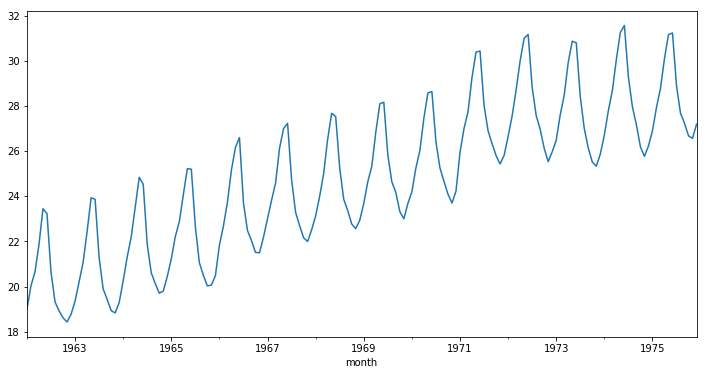

In [20]:
milk.daily.plot(figsize=(12,6))

In [28]:
milk.daily_diff1 = milk.daily - milk.daily.shift(12)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(milk.daily_diff1[12:])[1])

Критерий Дики-Фуллера: p=0.221277


In [29]:
milk.daily_diff2 = milk.daily_diff1 - milk.daily_diff1.shift(1)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(milk.daily_diff2[13:])[1])

Критерий Дики-Фуллера: p=0.000002


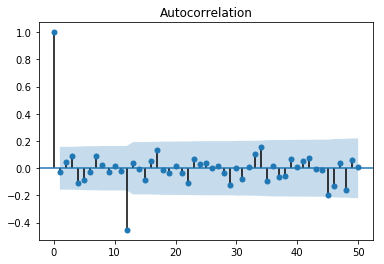

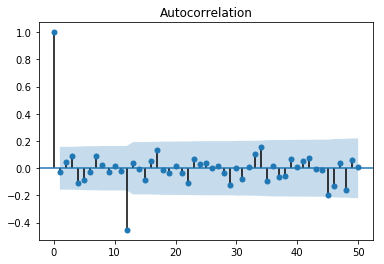

In [31]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff2[13:].values.squeeze(), lags=50)

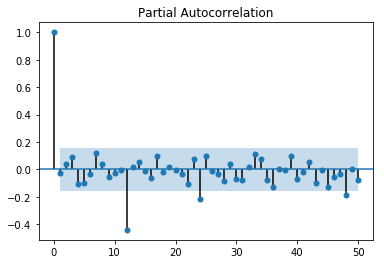

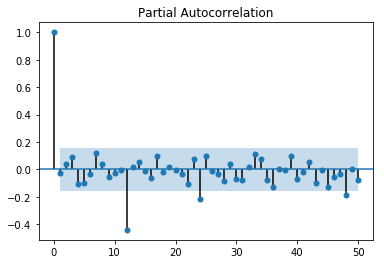

In [33]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk.daily_diff2[13:].values.squeeze(), lags=50)